In [245]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,confusion_matrix,recall_score,classification_report,precision_score,f1_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier,VotingClassifier


In [59]:
df=pd.read_csv('StudentsPerformance.csv')

In [60]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [62]:
x=df.drop('math score',axis=1)

In [63]:
y=df['math score']

In [64]:
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [65]:
ohe=OneHotEncoder(drop='first')

In [66]:
x['gender']=ohe.fit_transform(x[['gender']]).toarray()

In [67]:
od=OrdinalEncoder(
    categories=[["high school","some high school","some college","associate's degree","bachelor's degree","master's degree"]]
,)

In [68]:
df['parental level of education']=od.fit_transform(df[['parental level of education']])

In [55]:
df['parental level of education'].nunique()

6

In [69]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,4.0,standard,none,72,72,74
1,female,group C,2.0,standard,completed,69,90,88
2,female,group B,5.0,standard,none,90,95,93
3,male,group A,3.0,free/reduced,none,47,57,44
4,male,group C,2.0,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,5.0,standard,completed,88,99,95
996,male,group C,0.0,free/reduced,none,62,55,55
997,female,group C,0.0,free/reduced,completed,59,71,65
998,female,group D,2.0,standard,completed,68,78,77


In [73]:
df['gender']=ohe.fit_transform(df[['gender']]).toarray()

In [74]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,group B,4.0,standard,none,72,72,74
1,0.0,group C,2.0,standard,completed,69,90,88
2,0.0,group B,5.0,standard,none,90,95,93
3,1.0,group A,3.0,free/reduced,none,47,57,44
4,1.0,group C,2.0,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,0.0,group E,5.0,standard,completed,88,99,95
996,1.0,group C,0.0,free/reduced,none,62,55,55
997,0.0,group C,0.0,free/reduced,completed,59,71,65
998,0.0,group D,2.0,standard,completed,68,78,77


In [75]:
newod=OrdinalEncoder(categories=[['none','completed']])

In [77]:
df['test preparation course']=newod.fit_transform(df[['test preparation course']])

In [78]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,group B,4.0,standard,0.0,72,72,74
1,0.0,group C,2.0,standard,1.0,69,90,88
2,0.0,group B,5.0,standard,0.0,90,95,93
3,1.0,group A,3.0,free/reduced,0.0,47,57,44
4,1.0,group C,2.0,standard,0.0,76,78,75
...,...,...,...,...,...,...,...,...
995,0.0,group E,5.0,standard,1.0,88,99,95
996,1.0,group C,0.0,free/reduced,0.0,62,55,55
997,0.0,group C,0.0,free/reduced,1.0,59,71,65
998,0.0,group D,2.0,standard,1.0,68,78,77


In [80]:
df=df.drop(['lunch','race/ethnicity'],axis=1)

In [87]:
x=df.drop('math score',axis=1)

In [89]:
y=df['math score']

In [90]:
x

,gender,parental level of education,test preparation course,reading score,writing score
0,0.0,4.0,0.0,72,74
1,0.0,2.0,1.0,90,88
2,0.0,5.0,0.0,95,93
3,1.0,3.0,0.0,57,44
4,1.0,2.0,0.0,78,75
...,...,...,...,...,...
995,0.0,5.0,1.0,99,95
996,1.0,0.0,0.0,55,55
997,0.0,0.0,1.0,71,65
998,0.0,2.0,1.0,78,77


C:\Program Files\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


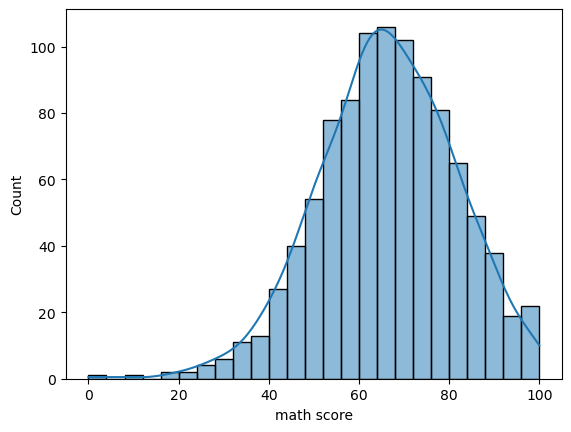

In [93]:
sns.histplot(y,kde=True)
plt.show()

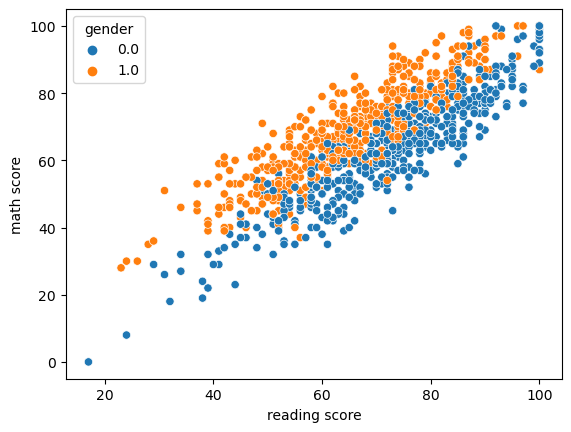

In [97]:
sns.scatterplot(x=x['reading score'],y=y,hue=df['gender'])
plt.show()

<Axes: xlabel='writing score', ylabel='math score'>

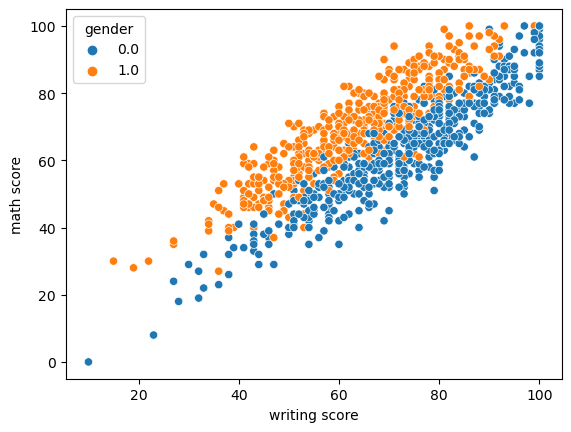

In [100]:
sns.scatterplot(x=x['writing score'],y=y,hue=x['gender'])

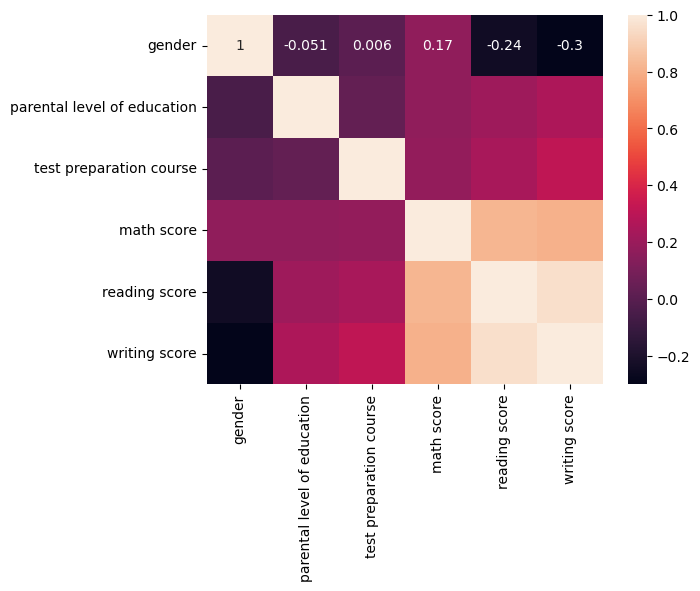

In [105]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [106]:
x

,gender,parental level of education,test preparation course,reading score,writing score
0,0.0,4.0,0.0,72,74
1,0.0,2.0,1.0,90,88
2,0.0,5.0,0.0,95,93
3,1.0,3.0,0.0,57,44
4,1.0,2.0,0.0,78,75
...,...,...,...,...,...
995,0.0,5.0,1.0,99,95
996,1.0,0.0,0.0,55,55
997,0.0,0.0,1.0,71,65
998,0.0,2.0,1.0,78,77


In [107]:
x['total_score']=x['reading score']+x['writing score']

In [110]:
x=x.drop(['reading score','writing score'],axis=1)

In [115]:
x=x.values

In [116]:
y=y.values

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [118]:
x_train

array([[  0.,   5.,   0., 145.],
       [  0.,   4.,   1., 166.],
       [  0.,   2.,   0., 175.],
       ...,
       [  0.,   3.,   0., 115.],
       [  1.,   2.,   1., 101.],
       [  0.,   3.,   0., 180.]])

In [120]:
lr=LinearRegression()

In [121]:
lr.fit(x_train,y_train)

LinearRegression()

In [122]:
lr.score(x_test,y_test)

0.8747476048425257

In [123]:
lr.score(x_train,y_train)

0.8419766008795382

In [126]:
mean_squared_error(y_test,lr.predict(x_test))

30.478717433787562

In [157]:
mean_absolute_error(y_test,lr.predict(x_test))

4.2979432475424195

In [158]:
r2_score(y_test,lr.predict(x_test))

0.8747476048425257

In [151]:
dt=DecisionTreeRegressor(max_depth=5)

In [152]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [153]:
dt.score(x_test,y_test)

0.8229716897538986

In [154]:
dt.score(x_train,y_train)

0.8509759984411783

In [156]:
mean_squared_error(y_test,dt.predict(x_test))

43.07778576998993

In [160]:
mean_absolute_error(y_test,dt.predict(x_test))

5.019178064702981

In [161]:
r2_score(y_test,dt.predict(x_test))

0.8229716897538986

In [164]:
km=KMeans(n_clusters=2)

In [236]:
y=km.fit_predict(x)

C:\Program Files\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [184]:
df1=pd.DataFrame(x,columns=['gender','parental level of education','test preparation course','total_score'])

In [189]:
df2=pd.Series(y)

C:\Program Files\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Program Files\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


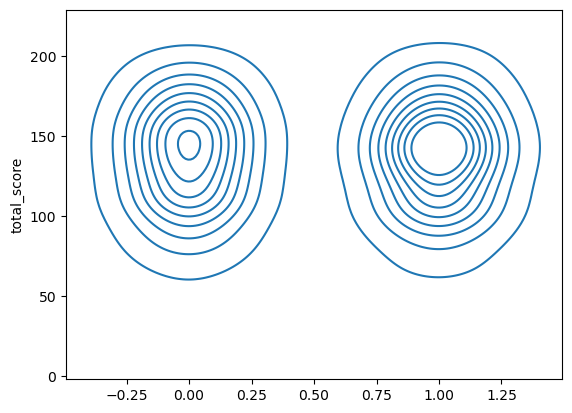

In [195]:
sns.kdeplot(x=df2,y=df1['total_score'])
plt.show()

In [204]:
df1=pd.concat([df1,df2],axis=1)

In [226]:
df1=df1.rename({0:'pass/fail'},axis=1)

In [228]:
df1[df1['pass/fail']==0]

,gender,parental level of education,test preparation course,total_score,pass/fail
3,1.0,3.0,0.0,101.0,0.0
4,1.0,2.0,0.0,153.0,0.0
5,0.0,3.0,0.0,161.0,0.0
8,1.0,0.0,1.0,131.0,0.0
9,0.0,0.0,0.0,110.0,0.0
...,...,...,...,...,...
792,1.0,0.0,0.0,143.0,0.0
794,0.0,0.0,0.0,103.0,0.0
796,1.0,0.0,0.0,140.0,0.0
797,0.0,3.0,0.0,165.0,0.0


In [229]:
df1[df1['pass/fail']==1]

,gender,parental level of education,test preparation course,total_score,pass/fail
0,0.0,4.0,0.0,146.0,1.0
1,0.0,2.0,1.0,178.0,1.0
2,0.0,5.0,0.0,188.0,1.0
6,0.0,2.0,1.0,187.0,1.0
7,1.0,2.0,0.0,82.0,1.0
...,...,...,...,...,...
790,0.0,0.0,0.0,122.0,1.0
791,0.0,2.0,0.0,136.0,1.0
793,1.0,1.0,1.0,161.0,1.0
795,0.0,3.0,1.0,141.0,1.0


<Axes: xlabel='test preparation course', ylabel='parental level of education'>

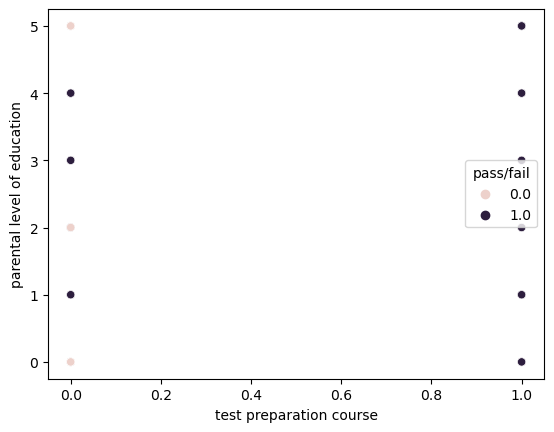

In [230]:
sns.scatterplot(x=df1['test preparation course'],y=df1['parental level of education'],hue=df1['pass/fail'])

In [231]:
x

array([[  0.,   4.,   0., 146.],
       [  0.,   2.,   1., 178.],
       [  0.,   5.,   0., 188.],
       ...,
       [  0.,   0.,   1., 136.],
       [  0.,   2.,   1., 155.],
       [  0.,   2.,   0., 172.]])

In [232]:
y

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,

In [238]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [234]:
x.shape

(1000, 4)

In [237]:
y.shape

(1000,)

In [240]:
lr=LogisticRegression()

In [241]:
lr.fit(x_train,y_train)

LogisticRegression()

In [242]:
lr.score(x_train,y_train)

1.0

In [243]:
lr.score(x_test,y_test)

1.0

In [246]:
confusion_matrix(y_test,lr.predict(x_test))

array([[111,   0],
       [  0,  89]], dtype=int64)

In [247]:
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        89

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

